<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-the-Bayesian-Hyperparameter-Optimisation-Algorithm" data-toc-modified-id="Import-the-Bayesian-Hyperparameter-Optimisation-Algorithm-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import the Bayesian Hyperparameter Optimisation Algorithm</a></span></li><li><span><a href="#Example-Use-Case" data-toc-modified-id="Example-Use-Case-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Example Use Case</a></span><ul class="toc-item"><li><span><a href="#Generate-some-tarining-data" data-toc-modified-id="Generate-some-tarining-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Generate some tarining data</a></span></li><li><span><a href="#Run-the-Optimisation" data-toc-modified-id="Run-the-Optimisation-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Run the Optimisation</a></span></li><li><span><a href="#Plot-the-Samples" data-toc-modified-id="Plot-the-Samples-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Plot the Samples</a></span></li></ul></li><li><span><a href="#Advanced-User-defined-Inputs" data-toc-modified-id="Advanced-User-defined-Inputs-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Advanced User-defined Inputs</a></span><ul class="toc-item"><li><span><a href="#Providing-your-own-scoring-function" data-toc-modified-id="Providing-your-own-scoring-function-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Providing your own scoring function</a></span><ul class="toc-item"><li><span><a href="#Example-1" data-toc-modified-id="Example-1-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Example 1</a></span></li><li><span><a href="#Example-2" data-toc-modified-id="Example-2-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Example 2</a></span></li></ul></li><li><span><a href="#Convergence-Diagnostics" data-toc-modified-id="Convergence-Diagnostics-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Convergence Diagnostics</a></span></li></ul></li><li><span><a href="#Ignore-this-for-now..." data-toc-modified-id="Ignore-this-for-now...-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Ignore this for now...</a></span></li></ul></div>

In [1]:
# That is setting up the autoreload mode to automatically 
# reload your imports when you edit a file
%load_ext autoreload
%autoreload 2

# Import the Bayesian Hyperparameter Optimisation Algorithm

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
from bayesian_hyperparameter_optimisation_3 import BayesianOptimisation
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, Matern, RBF

# Example Use Case
## Generate some tarining data

In [3]:
def generate_noisy_data_from_bivariate_gaussian(z):
    
    "Define a simple 2-D gaussian to generate noisy data"
    
    x = z[:,0].reshape(-1,1)
    y = z[:,1].reshape(-1,1)
    return 1-np.exp(-((x-5)/10)**2)*np.exp(-((y-10)/10)**2)+0.1*np.random.uniform(size=(1000,1))#,loc=0,scale=1)


# --- Generate our training data

# Generate random x data from 0 to 15
X_train = 15*np.random.uniform(size=(1000,2))
# Generate noisy data from a 2D gaussian defined above
y_train = generate_noisy_data_from_bivariate_gaussian(X_train)
y_train = y_train.ravel()




## Run the Optimisation

In [ ]:
# --- Define our hyper parameter space as a dictionary. 

# Use the names of the hyper parameters as the keys
# Values should be a list for discrete values and [lower_bound,upper_bound] for continuous
hps = {
    'n_estimators':range(1,20),
    'max_depth':range(1,10),
    'min_samples_leaf': [0.1,0.5]
}

# --- Run the Bayesian Optimisation Code

BOout = BayesianOptimisation(
    hps=hps,
    MLmodel = RandomForestRegressor(random_state=42),
    NpI = 5,
    Niter = 15,
    y_train = y_train,
    X_train = X_train,
    n_restarts = 10,
)
BOout.optimise()

INFO:root:Will perform 15 iterations
INFO:root:Iteration 0


{'max_depth': 1, 'min_samples_leaf': 0.30000000000000004, 'n_estimators': 6}
{'max_depth': 1, 'min_samples_leaf': 0.30000000000000004, 'n_estimators': 6} score: 0.41723610496860875
{'max_depth': 5, 'min_samples_leaf': 0.38, 'n_estimators': 2}
{'max_depth': 5, 'min_samples_leaf': 0.38, 'n_estimators': 2} score: -0.012146062392077406
{'max_depth': 6, 'min_samples_leaf': 0.14, 'n_estimators': 10}
{'max_depth': 6, 'min_samples_leaf': 0.14, 'n_estimators': 10} score: 0.7834652564818496
{'max_depth': 8, 'min_samples_leaf': 0.4600000000000001, 'n_estimators': 17}
{'max_depth': 8, 'min_samples_leaf': 0.4600000000000001, 'n_estimators': 17} score: -0.008378617416458178
{'max_depth': 3, 'min_samples_leaf': 0.22000000000000003, 'n_estimators': 13}
{'max_depth': 3, 'min_samples_leaf': 0.22000000000000003, 'n_estimators': 13} score: 0.5558271549605054
next iteration
res.x: [ 7.   0.4 16. ]
res.x: [ 1.    0.32 18.  ]

INFO:root:Iteration 1
INFO:root:Iteration 2



res.x: [8.   0.24 1.  ]
res.x: [6.   0.16 3.  ]
res.x: [ 5.    0.12 12.  ]
res.x: [ 3.    0.48 14.  ]
res.x: [4.   0.36 5.  ]
res.x: [ 3.    0.28 10.  ]
res.x: [2.  0.2 7. ]
res.x: [7.   0.44 9.  ]
X_next: [[ 7. ]
 [ 0.4]
 [16. ]]
{'max_depth': 7, 'min_samples_leaf': 0.4, 'n_estimators': 16}
{'max_depth': 7, 'min_samples_leaf': 0.4, 'n_estimators': 16} score: -0.008359711758322064
current accuracy: -0.008359711758322064
best accuracy: 0.7834652564818496
next iteration
res.x: [ 7.    0.44 10.  ]
res.x: [7.   0.48 7.  ]
res.x: [ 5.    0.24 16.  ]
res.x: [3.   0.16 9.  ]
res.x: [6.   0.28 5.  ]
res.x: [ 2.    0.12 14.  ]
res.x: [4.   0.32 3.  ]
res.x: [ 1.   0.2 12. ]
res.x: [ 3.    0.36 18.  ]
res.x: [8.  0.4 1. ]
X_next: [[3.  ]
 [0.16]
 [9.  ]]
{'max_depth': 3, 'min_samples_leaf': 0.16000000000000003, 'n_estimators': 9}
{'max_depth': 3, 'min_samples_leaf': 0.16000000000000003, 'n_estimators': 9} score: 0.7758889566588596
current accuracy: 0.7758889566588596
best accuracy: 0.7834652564

INFO:root:Iteration 3
INFO:root:Iteration 4
INFO:root:Iteration 5


{'max_depth': 3, 'min_samples_leaf': 0.28, 'n_estimators': 10} score: 0.46852619298481
current accuracy: 0.46852619298481
best accuracy: 0.7834652564818496
next iteration
res.x: [3.   0.12 1.  ]
res.x: [ 6.    0.44 14.  ]
res.x: [8.   0.48 7.  ]
res.x: [ 1.   0.2 18. ]
res.x: [ 7.    0.28 16.  ]
res.x: [ 7.    0.16 12.  ]
res.x: [ 3.    0.32 10.  ]
res.x: [2.  0.4 5. ]
res.x: [4.   0.36 3.  ]
res.x: [5.   0.24 9.  ]
X_next: [[ 3.  ]
 [ 0.32]
 [10.  ]]
{'max_depth': 3, 'min_samples_leaf': 0.32000000000000006, 'n_estimators': 10}
{'max_depth': 3, 'min_samples_leaf': 0.32000000000000006, 'n_estimators': 10} score: 0.11200043782181188
current accuracy: 0.11200043782181188
best accuracy: 0.7834652564818496
next iteration
res.x: [3.  0.4 7. ]
res.x: [ 7.    0.48 10.  ]
res.x: [5.   0.12 9.  ]
res.x: [ 3.    0.44 14.  ]
res.x: [1.  0.2 3. ]
res.x: [ 2.    0.24 12.  ]
res.x: [ 6.    0.36 16.  ]
res.x: [8.   0.28 1.  ]
res.x: [ 7.    0.16 18.  ]
res.x: [4.   0.32 5.  ]
X_next: [[5.  ]
 [0.12]
 

INFO:root:Iteration 6
INFO:root:Iteration 7
INFO:root:Iteration 8


{'max_depth': 3, 'min_samples_leaf': 0.16000000000000003, 'n_estimators': 10} score: 0.7779499751645844
current accuracy: 0.7779499751645844
best accuracy: 0.7990162760853565
next iteration
res.x: [2.  0.4 3. ]
res.x: [ 3.    0.28 18.  ]
res.x: [ 7.    0.12 16.  ]
res.x: [ 1.    0.36 10.  ]
res.x: [ 7.    0.44 12.  ]
res.x: [8.   0.24 9.  ]
res.x: [3.   0.16 5.  ]
res.x: [4.  0.2 1. ]
res.x: [ 6.    0.32 14.  ]
res.x: [5.   0.48 7.  ]
X_next: [[ 1.  ]
 [ 0.36]
 [10.  ]]
{'max_depth': 1, 'min_samples_leaf': 0.3600000000000001, 'n_estimators': 10}
{'max_depth': 1, 'min_samples_leaf': 0.3600000000000001, 'n_estimators': 10} score: -0.009335740534074289
current accuracy: -0.009335740534074289
best accuracy: 0.7990162760853565
next iteration
res.x: [ 3.    0.44 12.  ]
res.x: [4.   0.24 1.  ]
res.x: [ 8.    0.36 10.  ]
res.x: [7.   0.28 9.  ]
res.x: [1.   0.48 3.  ]
res.x: [ 3.    0.12 14.  ]
res.x: [ 6.   0.4 16. ]
res.x: [2.  0.2 7. ]
res.x: [ 5.    0.16 18.  ]
res.x: [7.   0.32 5.  ]
X_ne

INFO:root:Iteration 9


## Plot the Samples

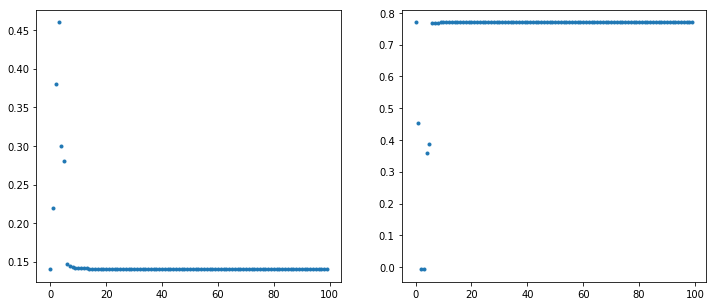

In [7]:
# --- Track the results with each iteration

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(BOout.Xt,'.')
plt.subplot(122)
plt.plot(BOout.Yt,'.')

plt.show()

In [9]:
best_params = BOout.Xt[np.argmax(BOout.Yt)]
RFr = RandomForestRegressor(
    min_samples_leaf=best_params[0],
    random_state=42
).fit(X_train,y_train)
np.mean(cross_val_score(RFr, X_train,y_train, cv=5))

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7700969003203069

# Advanced User-defined Inputs
## Providing your own scoring function

### Example 1

In [17]:
# --- Define our hyper parameter space as a dictionary. 

# Use the names of the hyper parameters as the keys
# Values should be a list for discrete values and [lower_bound,upper_bound] for continuous
# hps = {
#     'n_estimators':range(1,10),
#     'max_depth':range(1,10)
# }

hps = {'min_samples_leaf':[0.1,0.5]}

# --- Run the Bayesian Optimisation Code
MLmodel = RandomForestRegressor(random_state=42)

def my_scoring_function(X_train, y_train):
    return MLmodel.score(X_train, y_train)

BOout = BayesianOptimisation(
    hps=hps,
    MLmodel = MLmodel,
    scoring_function = my_scoring_function,
    NpI = 5,
    Niter = 95,
    y_train = y_train,
    X_train = X_train,
    n_restarts = 10,
).optimise()

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
INFO:root:Will perform 95 iterations
INFO:root:Iteration 0
INFO:root:Iteration 1
INFO:root:Iteration 2


{'min_samples_leaf': 0.30000000000000004} 0.4181731386486091
{'min_samples_leaf': 0.38} -8.105585937734361e-05
{'min_samples_leaf': 0.22000000000000003} 0.4813176890428952
{'min_samples_leaf': 0.4600000000000001} -8.105585937734361e-05
{'min_samples_leaf': 0.14} 0.7611842226514938
{'min_samples_leaf': 0.4} -8.105585937734361e-05
current accuracy: -8.105585937734361e-05
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14676880525842798} 0.7589063976029433
current accuracy: 0.7589063976029433
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.1442202864946111} 0.7590671038092716
current accuracy: 0.7590671038092716
best accuracy: 0.7611842226514938


INFO:root:Iteration 3
INFO:root:Iteration 4
INFO:root:Iteration 5
INFO:root:Iteration 6


{'min_samples_leaf': 0.14307556726804202} 0.7597490697232373
current accuracy: 0.7597490697232373
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14242542002748845} 0.7604543509917512
current accuracy: 0.7604543509917512
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14200566982173699} 0.7604543509917512
current accuracy: 0.7604543509917512
best accuracy: 0.7611842226514938


INFO:root:Iteration 7
INFO:root:Iteration 8


{'min_samples_leaf': 0.1417125772516667} 0.7607869359838187
current accuracy: 0.7607869359838187
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14149568721267625} 0.7607869359838187
current accuracy: 0.7607869359838187
best accuracy: 0.7611842226514938


INFO:root:Iteration 9
INFO:root:Iteration 10
INFO:root:Iteration 11


{'min_samples_leaf': 0.14132891255904148} 0.7607869359838187
current accuracy: 0.7607869359838187
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14119643126696085} 0.7607869359838187
current accuracy: 0.7607869359838187
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14108872148081825} 0.7607869359838187
current accuracy: 0.7607869359838187
best accuracy: 0.7611842226514938


INFO:root:Iteration 12
INFO:root:Iteration 13
INFO:root:Iteration 14
INFO:root:Iteration 15


{'min_samples_leaf': 0.14099929424194693} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14092360866263884} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14085897899775773} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.1408031519513505} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 16
INFO:root:Iteration 17
INFO:root:Iteration 18


{'min_samples_leaf': 0.1407543332497428} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14071120120131744} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14067285736955257} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14063867058962976} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 19
INFO:root:Iteration 20
INFO:root:Iteration 21
INFO:root:Iteration 22


{'min_samples_leaf': 0.14060776632639085} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14057985790809274} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14055449079723217} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 23
INFO:root:Iteration 24
INFO:root:Iteration 25


{'min_samples_leaf': 0.14053128982983545} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14051010495152558} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.1404905611857767} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.1404724096695227} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 26
INFO:root:Iteration 27
INFO:root:Iteration 28
INFO:root:Iteration 29


{'min_samples_leaf': 0.1404556179313688} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14043995732761455} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14042563839242567} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 30
INFO:root:Iteration 31
INFO:root:Iteration 32


{'min_samples_leaf': 0.14041200847264937} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.1403993849429238} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14038740317023307} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 33
INFO:root:Iteration 34
INFO:root:Iteration 35


{'min_samples_leaf': 0.14037627786651008} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14036550942629109} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14035589881775437} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 36
INFO:root:Iteration 37
INFO:root:Iteration 38


{'min_samples_leaf': 0.14034648840034813} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14033753716203082} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.1403291023332784} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 39
INFO:root:Iteration 40
INFO:root:Iteration 41


{'min_samples_leaf': 0.14032085206103145} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14031338525273238} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14030603594236357} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 42
INFO:root:Iteration 43
INFO:root:Iteration 44


{'min_samples_leaf': 0.14029938312689133} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.1402924496339035} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14028629847846752} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 45
INFO:root:Iteration 46
INFO:root:Iteration 47


{'min_samples_leaf': 0.14028033255305145} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.1402745252455713} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14026910774852333} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 48
INFO:root:Iteration 49
INFO:root:Iteration 50


{'min_samples_leaf': 0.14026364929281676} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14025876757583508} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.1402536159248811} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 51
INFO:root:Iteration 52


{'min_samples_leaf': 0.1402489461301869} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.1402444858970068} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 53
INFO:root:Iteration 54
INFO:root:Iteration 55


{'min_samples_leaf': 0.14024006546215845} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14023600462907518} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14023199978332873} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 56
INFO:root:Iteration 57


{'min_samples_leaf': 0.1402278733678531} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.1402241748526217} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.1402205584899098} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 58
INFO:root:Iteration 59
INFO:root:Iteration 60


{'min_samples_leaf': 0.14021709685717282} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14021353913847254} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 61
INFO:root:Iteration 62


{'min_samples_leaf': 0.1402102828729545} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14020705702148734} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14020409887666727} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 63
INFO:root:Iteration 64
INFO:root:Iteration 65


{'min_samples_leaf': 0.140200811995052} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.1401979703581946} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 66
INFO:root:Iteration 67


{'min_samples_leaf': 0.14019513811052936} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14019249281282836} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 68
INFO:root:Iteration 69


{'min_samples_leaf': 0.14018987229816302} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14018711037668993} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 70
INFO:root:Iteration 71


{'min_samples_leaf': 0.14018491213617315} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14018226863050987} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 72
INFO:root:Iteration 73


{'min_samples_leaf': 0.14017968138006723} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14017751024685635} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 74
INFO:root:Iteration 75


{'min_samples_leaf': 0.1401751993004472} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14017282179206617} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14017094771109084} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 76
INFO:root:Iteration 77
INFO:root:Iteration 78


{'min_samples_leaf': 0.1401688487805507} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14016671070069836} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 79
INFO:root:Iteration 80


{'min_samples_leaf': 0.14016494849988403} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14016276322262816} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 81
INFO:root:Iteration 82


{'min_samples_leaf': 0.14016098507581787} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.1401588426706058} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 83
INFO:root:Iteration 84
INFO:root:Iteration 85


{'min_samples_leaf': 0.14015729151926518} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14015532533530606} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.1401537049403796} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 86
INFO:root:Iteration 87


{'min_samples_leaf': 0.1401522295921708} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14015045751160662} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14014873707534556} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 88
INFO:root:Iteration 89
INFO:root:Iteration 90


{'min_samples_leaf': 0.14014730765769765} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14014600730739502} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 91
INFO:root:Iteration 92


{'min_samples_leaf': 0.14014421444238667} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.1401430023804491} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14014132111006006} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 93
INFO:root:Iteration 94
INFO:root:Best result 0.7611842226514938: Params: [0.14]
INFO:root:Best result 0.7611842226514938: Params: {'bootstrap': 0.14}


{'min_samples_leaf': 0.14013985799698817} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14013854704119993} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


### Example 2

In [ ]:
# --- Define our hyper parameter space as a dictionary. 

# Use the names of the hyper parameters as the keys
# Values should be a list for discrete values and [lower_bound,upper_bound] for continuous
# hps = {
#     'n_estimators':range(1,10),
#     'max_depth':range(1,10)
# }

hps = {'min_samples_leaf':[0.1,0.5]}

# --- Run the Bayesian Optimisation Code
MLmodel = RandomForestRegressor(random_state=42)

BOout = BayesianOptimisation(
    hps=hps,
    MLmodel = MLmodel,
    scoring_function = MLmodel.score,
    NpI = 5,
    Niter = 95,
    y_train = y_train,
    X_train = X_train,
    n_restarts = 10,
).optimise()

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
INFO:root:Will perform 95 iterations
INFO:root:Iteration 0
INFO:root:Iteration 1
INFO:root:Iteration 2


{'min_samples_leaf': 0.22000000000000003} 0.4813176890428952
{'min_samples_leaf': 0.14} 0.7611842226514938
{'min_samples_leaf': 0.4600000000000001} -8.105585937734361e-05
{'min_samples_leaf': 0.30000000000000004} 0.4181731386486091
{'min_samples_leaf': 0.38} -8.105585937734361e-05
{'min_samples_leaf': 0.16000000000000003} 0.7506234076621161
current accuracy: 0.7506234076621161
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14500071901704767} 0.758548068733668
current accuracy: 0.758548068733668
best accuracy: 0.7611842226514938


INFO:root:Iteration 3
INFO:root:Iteration 4
INFO:root:Iteration 5


{'min_samples_leaf': 0.14359800654588614} 0.7597490697232373
current accuracy: 0.7597490697232373
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14281551301451326} 0.7604543509917512
current accuracy: 0.7604543509917512
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.1423166685308091} 0.7604543509917512
current accuracy: 0.7604543509917512
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14197114286162132} 0.7607869359838187
current accuracy: 0.7607869359838187
best accuracy: 0.7611842226514938


INFO:root:Iteration 6
INFO:root:Iteration 7
INFO:root:Iteration 8
INFO:root:Iteration 9


{'min_samples_leaf': 0.141717220259729} 0.7607869359838187
current accuracy: 0.7607869359838187
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.1415226278231482} 0.7607869359838187
current accuracy: 0.7607869359838187
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.1413687435551261} 0.7607869359838187
current accuracy: 0.7607869359838187
best accuracy: 0.7611842226514938


INFO:root:Iteration 10
INFO:root:Iteration 11
INFO:root:Iteration 12


{'min_samples_leaf': 0.14124389354935635} 0.7607869359838187
current accuracy: 0.7607869359838187
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14114050141384749} 0.7607869359838187
current accuracy: 0.7607869359838187
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14105347788853914} 0.7607869359838187
current accuracy: 0.7607869359838187
best accuracy: 0.7611842226514938


INFO:root:Iteration 13
INFO:root:Iteration 14


{'min_samples_leaf': 0.14097910774705696} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14091472897980928} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.1408586094476931} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 15
INFO:root:Iteration 16
INFO:root:Iteration 17
INFO:root:Iteration 18


{'min_samples_leaf': 0.14080913192964453} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.1407652305916371} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14072592861226316} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 19
INFO:root:Iteration 20
INFO:root:Iteration 21


{'min_samples_leaf': 0.1406906148518981} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.1406587097872982} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.1406297208136269} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 22
INFO:root:Iteration 23
INFO:root:Iteration 24


{'min_samples_leaf': 0.1406032882885509} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14057893927770826} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14055663146242953} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 25
INFO:root:Iteration 26
INFO:root:Iteration 27


{'min_samples_leaf': 0.14053592379649466} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.1405169350284069} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14049921494078055} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 28
INFO:root:Iteration 29
INFO:root:Iteration 30


{'min_samples_leaf': 0.14048271698603643} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.140467070884656} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14045270548183333} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 31
INFO:root:Iteration 32
INFO:root:Iteration 33


{'min_samples_leaf': 0.14043920429979037} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14042662126576239} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.1404145191303343} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 34
INFO:root:Iteration 35


{'min_samples_leaf': 0.14040306855642762} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.1403924885252998} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 36
INFO:root:Iteration 37


{'min_samples_leaf': 0.14038238251857807} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.1403726310805419} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 38
INFO:root:Iteration 39
INFO:root:Iteration 40


{'min_samples_leaf': 0.14036362454534673} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14035470709928402} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14034680809441266} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 41
INFO:root:Iteration 42


{'min_samples_leaf': 0.14033900927495396} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14033150207357958} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 43
INFO:root:Iteration 44


{'min_samples_leaf': 0.1403241481248132} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14031738468992408} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 45
INFO:root:Iteration 46


{'min_samples_leaf': 0.14031080911750027} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14030458378668806} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 47
INFO:root:Iteration 48


{'min_samples_leaf': 0.14029853497401615} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14029275754677403} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


INFO:root:Iteration 49
INFO:root:Iteration 50


{'min_samples_leaf': 0.1402871904764465} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938
{'min_samples_leaf': 0.14028195937492788} 0.7611835084856301
current accuracy: 0.7611835084856301
best accuracy: 0.7611842226514938


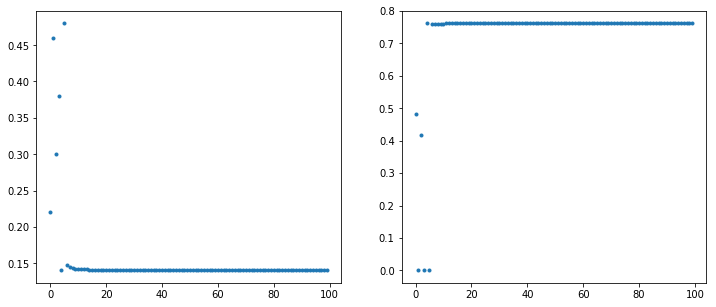

In [14]:
# --- Track the results with each iteration

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(BOout.Xt,'.')
plt.subplot(122)
plt.plot(BOout.Yt,'.')

plt.show()

## Convergence Diagnostics
Plot the convergence of the hyper parameters with each iteration

In [44]:
hps = {'min_samples_leaf':[0.1,0.5],
       'n_estimators':range(1,10)}

# --- Run the Bayesian Optimisation Code
MLmodel = RandomForestRegressor(random_state=42)

noise = 0.05
BOout = BayesianOptimisation(
    hps=hps,
    MLmodel = MLmodel,
    NpI = 5,
    Niter = 25,
    y_train = y_train,
    X_train = X_train,
    n_restarts = 10,
    noise = noise
).optimise()

INFO:root:Will perform 25 iterations
INFO:root:Iteration 0
INFO:root:Iteration 1
INFO:root:Iteration 2


{'min_samples_leaf': 0.22000000000000003, 'n_estimators': 6} 0.4869763571786211
{'min_samples_leaf': 0.14, 'n_estimators': 5} 0.7548923686274063
{'min_samples_leaf': 0.38, 'n_estimators': 8} -0.011266439223975277
{'min_samples_leaf': 0.30000000000000004, 'n_estimators': 1} 0.2642889838174654
{'min_samples_leaf': 0.4600000000000001, 'n_estimators': 3} -0.011410073649103004
{'min_samples_leaf': 0.28, 'n_estimators': 6} 0.4211767759333932
current accuracy: 0.4211767759333932
best accuracy: 0.7548923686274063
{'min_samples_leaf': 0.48, 'n_estimators': 5} -0.011770500251822514
current accuracy: -0.011770500251822514
best accuracy: 0.7548923686274063


INFO:root:Iteration 3
INFO:root:Iteration 4
INFO:root:Iteration 5
INFO:root:Iteration 6


{'min_samples_leaf': 0.24000000000000002, 'n_estimators': 5} 0.4547051067758671
current accuracy: 0.4547051067758671
best accuracy: 0.7548923686274063
{'min_samples_leaf': 0.28, 'n_estimators': 5} 0.39168719819448905
current accuracy: 0.39168719819448905
best accuracy: 0.7548923686274063
{'min_samples_leaf': 0.47998263611189484, 'n_estimators': 5} -0.011770500251822514
current accuracy: -0.011770500251822514
best accuracy: 0.7548923686274063
{'min_samples_leaf': 0.3600000000000001, 'n_estimators': 5} -0.011770500251822514
current accuracy: -0.011770500251822514
best accuracy: 0.7548923686274063


INFO:root:Iteration 7
INFO:root:Iteration 8
INFO:root:Iteration 9


{'min_samples_leaf': 0.24000000000000002, 'n_estimators': 5} 0.4547051067758671
current accuracy: 0.4547051067758671
best accuracy: 0.7548923686274063
{'min_samples_leaf': 0.3600000000000001, 'n_estimators': 5} -0.011770500251822514
current accuracy: -0.011770500251822514
best accuracy: 0.7548923686274063
{'min_samples_leaf': 0.1756542456279634, 'n_estimators': 5} 0.7262837029401316
current accuracy: 0.7262837029401316
best accuracy: 0.7548923686274063


INFO:root:Iteration 10
INFO:root:Iteration 11


{'min_samples_leaf': 0.16553466026876887, 'n_estimators': 5} 0.739550238119368
current accuracy: 0.739550238119368
best accuracy: 0.7548923686274063
{'min_samples_leaf': 0.16014561569153735, 'n_estimators': 5} 0.7454326585825202
current accuracy: 0.7454326585825202
best accuracy: 0.7548923686274063


INFO:root:Iteration 12
INFO:root:Iteration 13


{'min_samples_leaf': 0.15673834423249133, 'n_estimators': 5} 0.7470583616734614
current accuracy: 0.7470583616734614
best accuracy: 0.7548923686274063
{'min_samples_leaf': 0.1802780659913318, 'n_estimators': 6} 0.7277826604685209
current accuracy: 0.7277826604685209
best accuracy: 0.7548923686274063


INFO:root:Iteration 14
INFO:root:Iteration 15


{'min_samples_leaf': 0.17697115320303577, 'n_estimators': 6} 0.7326096550378344
current accuracy: 0.7326096550378344
best accuracy: 0.7548923686274063
{'min_samples_leaf': 0.15353420436649037, 'n_estimators': 5} 0.754111958887437
current accuracy: 0.754111958887437
best accuracy: 0.7548923686274063


INFO:root:Iteration 16
INFO:root:Iteration 17


{'min_samples_leaf': 0.1738797554777163, 'n_estimators': 6} 0.7375808057825913
current accuracy: 0.7375808057825913
best accuracy: 0.7548923686274063
{'min_samples_leaf': 0.15169931559388267, 'n_estimators': 5} 0.754504376276938
current accuracy: 0.754504376276938
best accuracy: 0.7548923686274063


INFO:root:Iteration 18
INFO:root:Iteration 19


{'min_samples_leaf': 0.15040070285112017, 'n_estimators': 5} 0.755382918392874
current accuracy: 0.755382918392874
best accuracy: 0.755382918392874
{'min_samples_leaf': 0.14937683270530588, 'n_estimators': 5} 0.7562241416180203
current accuracy: 0.7562241416180203
best accuracy: 0.7562241416180203


INFO:root:Iteration 20
INFO:root:Iteration 21


{'min_samples_leaf': 0.16779997497885374, 'n_estimators': 6} 0.7394856659951404
current accuracy: 0.7394856659951404
best accuracy: 0.7562241416180203
{'min_samples_leaf': 0.14847609617170793, 'n_estimators': 5} 0.7551649840467602
current accuracy: 0.7551649840467602
best accuracy: 0.7562241416180203


INFO:root:Iteration 22
INFO:root:Iteration 23


{'min_samples_leaf': 0.16637268781053605, 'n_estimators': 6} 0.7401858177445808
current accuracy: 0.7401858177445808
best accuracy: 0.7562241416180203
{'min_samples_leaf': 0.1477494201930489, 'n_estimators': 5} 0.7551649840467602
current accuracy: 0.7551649840467602
best accuracy: 0.7562241416180203


INFO:root:Iteration 24
INFO:root:Best result 0.7562241416180203: Params: [0.14937683 5.        ]
INFO:root:Best result 0.7562241416180203: Params: {'bootstrap': 0.14937683270530588, 'criterion': 5.0}


{'min_samples_leaf': 0.14717796010125048, 'n_estimators': 5} 0.755113084234518
current accuracy: 0.755113084234518
best accuracy: 0.7562241416180203
{'min_samples_leaf': 0.1466898219793937, 'n_estimators': 5} 0.755113084234518
current accuracy: 0.755113084234518
best accuracy: 0.7562241416180203


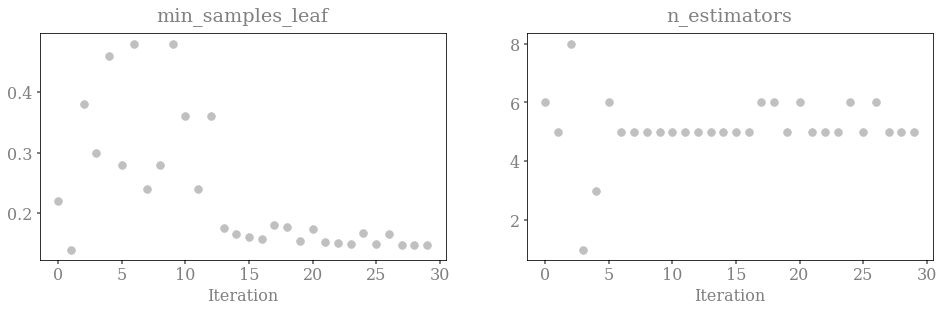

In [46]:
BOout.hyperparameter_convergence_plots()

# Ignore this for now...

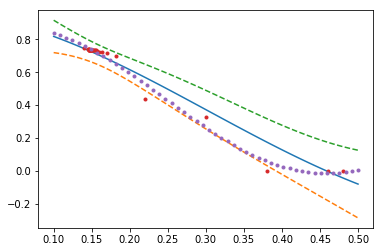

In [69]:
noise = 0.001
x=np.linspace(0.1, 0.5).reshape(-1,1)
y, std = BOout.gpr.predict(x, return_std=True)
y1, std1 = GaussianProcessRegressor(kernel=RBF(), alpha=noise * 2).fit(BOout.Xt, BOout.Yt).predict(x, return_std=True)
plt.plot(x, y)
plt.plot(x, y - std, '--')
plt.plot(x, y + std, '--')
plt.plot(BOout.Xt, BOout.Yt, '.')
plt.plot(x, y1, '.')

In [65]:
BOout.Yt.shape


(100,)